In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Separate Id from link to download file
link = "https://drive.google.com/open?id=1eVD7UrYxjQPhqTSNaYDaZNHciav34LTo"
fluff, id = link.split('=')
print (id)

1eVD7UrYxjQPhqTSNaYDaZNHciav34LTo


In [0]:
#Import csv file for train data
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  
data = pd.read_csv('train.csv')

In [46]:
pandas_profiling.ProfileReport(data)

Number of variables,29
Number of observations,116058
Total Missing (%),0.0%
Total size in memory,25.7 MiB
Average record size in memory,232.0 B
Numeric,20
Categorical,5
Boolean,3
Date,0
Text (Unique),0
Rejected,1


In [6]:
headings = list(data.head(0))
print(headings)
print(len(headings))

['loan_id', 'source', 'financial_institution', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'origination_date', 'first_payment_date', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']
29


In [7]:
for i in range(1,16):
  print(headings[i],":", len(set(data[headings[i]])))

source : 3
financial_institution : 19
interest_rate : 923
unpaid_principal_bal : 646
loan_term : 140
origination_date : 3
first_payment_date : 4
loan_to_value : 92
number_of_borrowers : 2
debt_to_income_ratio : 58
borrower_credit_score : 221
loan_purpose : 3
insurance_percent : 14
co-borrower_credit_score : 216
insurance_type : 2


In [0]:
X = data.iloc[:,1:28]
y = data.iloc[:, -1]

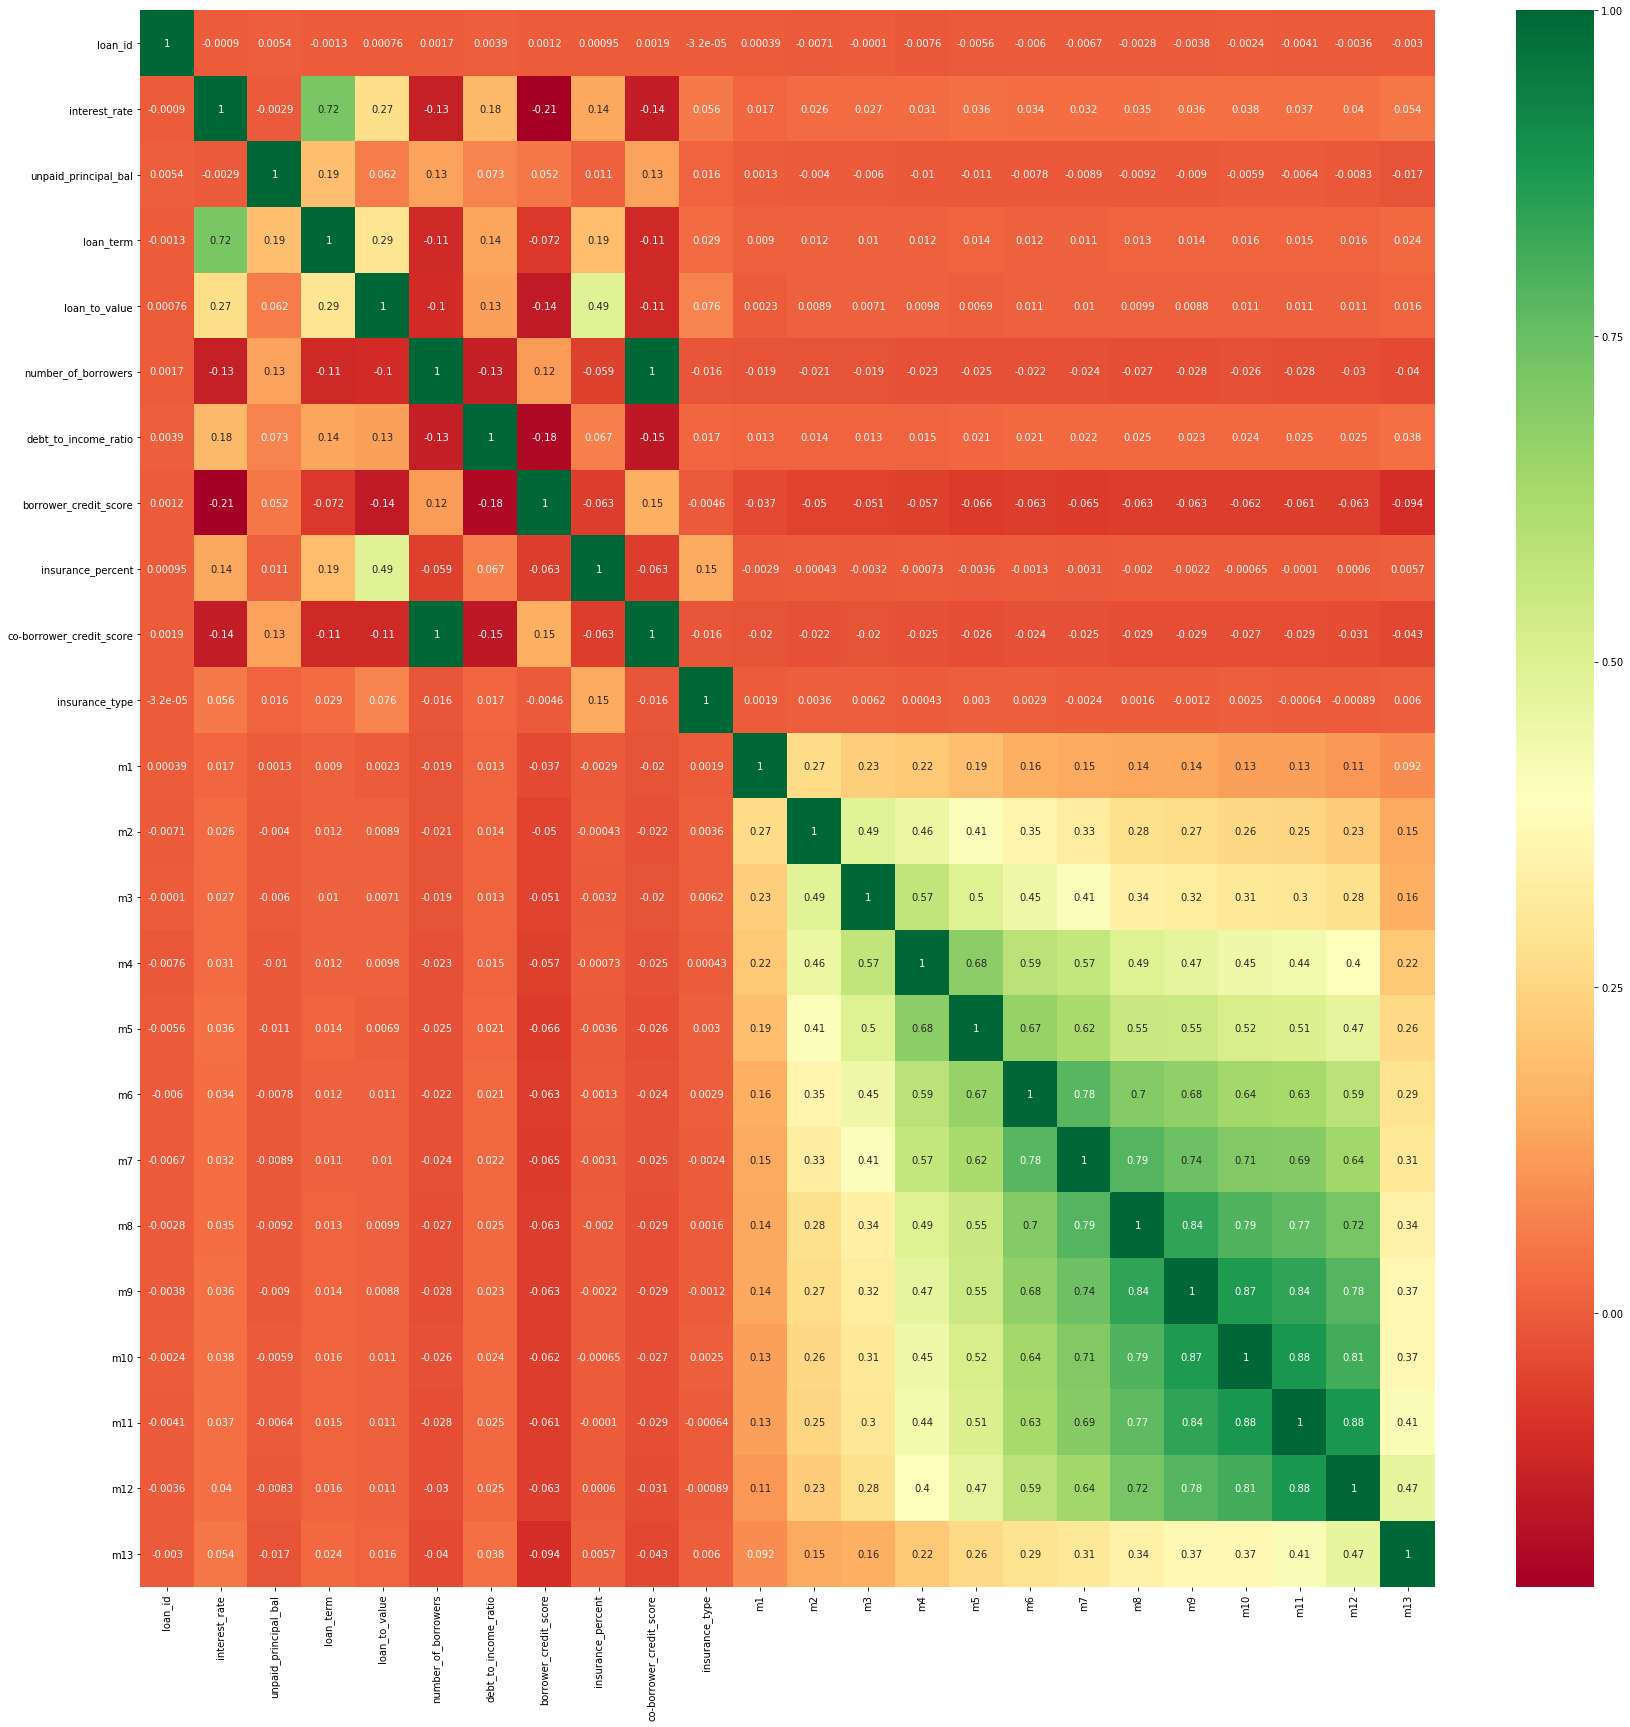

In [13]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(29,29))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
X = X.iloc[:, 18:28]

In [16]:
X.head()

,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,1
4,3,4,5,6,7,8,9,10,11


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
classifier = RandomForestClassifier(criterion ='entropy', max_depth = 10, max_features ='auto',
                            n_estimators = 100, class_weight='balanced', n_jobs=-1, random_state=42 )


classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [24]:
# model.feature_importances_
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 8 (0.393243)
2. feature 7 (0.215163)
3. feature 6 (0.106964)
4. feature 5 (0.098092)
5. feature 4 (0.087568)
6. feature 3 (0.035427)
7. feature 1 (0.032234)
8. feature 0 (0.018674)
9. feature 2 (0.012636)


In [0]:
# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
import keras
from keras.models import Sequential    #Used to initialise neural net
from keras.layers import Dense 
classifier = Sequential()
classifier.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu',input_dim = 9))
classifier.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 32, epochs =8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=9, units=4, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


Epoch 1/8
92846/92846 [==============================] - 13s 142us/step - loss: 0.0808 - acc: 0.9945
Epoch 2/8
92846/92846 [==============================] - 13s 139us/step - loss: 0.0222 - acc: 0.9945
Epoch 3/8
92846/92846 [==============================] - 13s 138us/step - loss: 0.0213 - acc: 0.9945
Epoch 4/8
92846/92846 [==============================] - 13s 139us/step - loss: 0.0210 - acc: 0.9950
Epoch 5/8
92846/92846 [==============================] - 13s 137us/step - loss: 0.0208 - acc: 0.9958
Epoch 6/8
92846/92846 [==============================] - 13s 139us/step - loss: 0.0207 - acc: 0.9958
Epoch 7/8
92846/92846 [==============================] - 13s 138us/step - loss: 0.0206 - acc: 0.9958
Epoch 8/8
92846/92846 [==============================] - 13s 138us/step - loss: 0.0206 - acc: 0.9958


In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.2).astype(np.int)

In [28]:
f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

0.5984848484848484

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23027    58]
 [   48    79]]


## Test Data

In [31]:
link = "https://drive.google.com/open?id=14W7x7ZHiDIqaQgRSZhHu6bdLuUTwF75C"
fluff, id = link.split('=')
print (id)

14W7x7ZHiDIqaQgRSZhHu6bdLuUTwF75C


In [0]:
downloaded1 = drive.CreateFile({'id':id}) 
downloaded1.GetContentFile('test.csv')  
dataTest = pd.read_csv('test.csv')

In [33]:
len(dataTest)

35866

In [34]:
dataTest.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = dataTest.iloc[:,1:28]

In [0]:
X_test = X.iloc[:, 18:28]

In [37]:
X_test.head()

,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.2).astype(np.int)
y_pred = y_pred.flatten()

In [0]:
submissions=pd.DataFrame({"loan_id": dataTest['loan_id'],
                         "m13": y_pred})
submissions.to_csv('prediction.csv',index=False, header=True)

In [0]:
# Download the prediction.csv file
from google.colab import files
files.download('prediction.csv') 

In [44]:
! ls

adc.json  prediction.csv  sample_data  test.csv  train.csv
